In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

In [10]:
import numpy as np
import os
import glob
import cv2
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [11]:
train_dir = r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train"
test_dir = r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test"
SIZE = 224

def load_data(directory):
    data = []
    labels = []
    for label in os.listdir(directory):
        for file in glob.glob(os.path.join(directory, label, '*.*')):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (SIZE, SIZE))
            data.append(img)
            labels.append(1 if label.endswith('g') else 0)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_data = train_data.reshape(-1, SIZE, SIZE, 3)
test_data = test_data.reshape(-1, SIZE, SIZE, 3)


In [12]:
import os

def count_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return 0

    image_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}:
                image_count += 1

    return image_count

train_directory =r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train"
test_directory =  r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test"

total_train_images = count_image_files(train_directory)
total_test_images = count_image_files(test_directory)

print(f"Total number of image files in training directory: {total_train_images}")
print(f"Total number of image files in testing directory: {total_test_images}")
print(f"Total number of image files in both directories: {total_train_images + total_test_images}")


Total number of image files in training directory: 1149
Total number of image files in testing directory: 452
Total number of image files in both directories: 1601


In [13]:
import os

def list_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return []

    all_files = os.listdir(directory)
    print("All files in directory:")
    print(all_files)  # Print all files to check contents
    
    image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}
    image_files = [file for file in all_files if os.path.splitext(file)[1].lower() in image_extensions]
    
    return image_files

image_directory =  r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train"

image_files = list_image_files(image_directory)

if image_files:
    print("Image files found:")
    for image_file in image_files:
        print(image_file)
else:
    print("No image files found.")


All files in directory:
['001', '001_forg', '002', '002_forg', '003', '003_forg', '004', '004_forg', '006', '006_forg', '009', '009_forg', '012', '012_forg', '013', '013_forg', '014', '014_forg', '015', '015_forg', '016', '016_forg', '017', '017_forg', '018', '018_forg', '019', '019_forg', '020', '020_forg', '021', '021_forg', '022', '022_forg', '023', '023_forg', '024', '024_forg', '025', '025_forg', '026', '026_forg', '027', '027_forg', '028', '028_forg', '029', '029_forg', '030', '030_forg', '031', '031_forg', '032', '032_forg', '033', '033_forg', '034', '034_forg', '035', '035_forg', '036', '036_forg', '037', '037_forg', '038', '038_forg', '039', '039_forg', '040', '040_forg', '041', '041_forg', '042', '042_forg', '043', '043_forg', '044', '044_forg', '045', '045_forg', '046', '046_forg', '047', '047_forg', '048', '048_forg']
No image files found.


In [14]:
import os

def list_person_folders(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return []
    
    return [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
train_directory = r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train"
test_directory = r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test"

train_folders = list_person_folders(train_directory)
test_folders = list_person_folders(test_directory)

common_folders = set(train_folders).intersection(set(test_folders))

if common_folders:
    print("Potential data leakage detected. The following folders are present in both train and test directories:")
    for folder in common_folders:
        print(folder)
else:
    print("No common folders found between train and test directories.")


No common folders found between train and test directories.


In [37]:
#CNN model

In [18]:
def build_model(input_shape):
    model1 = models.Sequential()
    model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Conv2D(512, (3, 3), activation='relu'))  
    model1.add(layers.MaxPooling2D((2, 2)))
    
    model1.add(layers.Flatten())
    
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dropout(0.40))  
    model1.add(layers.Dense(2, activation='softmax'))  # Single output for binary classification
    
    return model1

input_shape = (SIZE, SIZE, 3)
model1 = build_model(input_shape)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy
model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,123,714 (30.99 MB)

 Trainable params: 8,123,714 (30.99 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model1.fit(
    train_data, train_labels,
    validation_split=0.3,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4867 - loss: 0.8580 - val_accuracy: 0.4899 - val_loss: 0.7012
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5895 - loss: 0.6823 - val_accuracy: 0.4899 - val_loss: 0.7028
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5801 - loss: 0.6827 - val_accuracy: 0.4899 - val_loss: 0.6986
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5686 - loss: 0.6845 - val_accuracy: 0.4899 - val_loss: 0.6951
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6230 - loss: 0.6566 - val_accuracy: 0.7768 - val_loss: 0.4650
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8186 - loss: 0.4706 - val_accuracy: 0.8348 - val_loss: 0.3776
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8762 - loss: 0.2940 - val_accuracy: 0.9710 - val_loss: 0.1172
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9096 - loss: 0.2429 - val_accuracy: 0.9420 - val_loss:

In [23]:

test_loss, test_acc = model1.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9204 - loss: 0.2485
Test Loss: 0.24282793700695038, Test Accuracy: 0.9225663542747498


In [ ]:
pip install pydot graphviz


In [10]:
from tensorflow.keras.utils import plot_model


In [8]:
plot_model(model1, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [115]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [24]:
model1.save(r"C:\Users\KanugulBharath Kumar\Downloads\6layer.keras")



In [26]:
from tensorflow.keras.models import load_model

model1 = load_model(r"C:\Users\KanugulBharath Kumar\Downloads\6layer.keras")


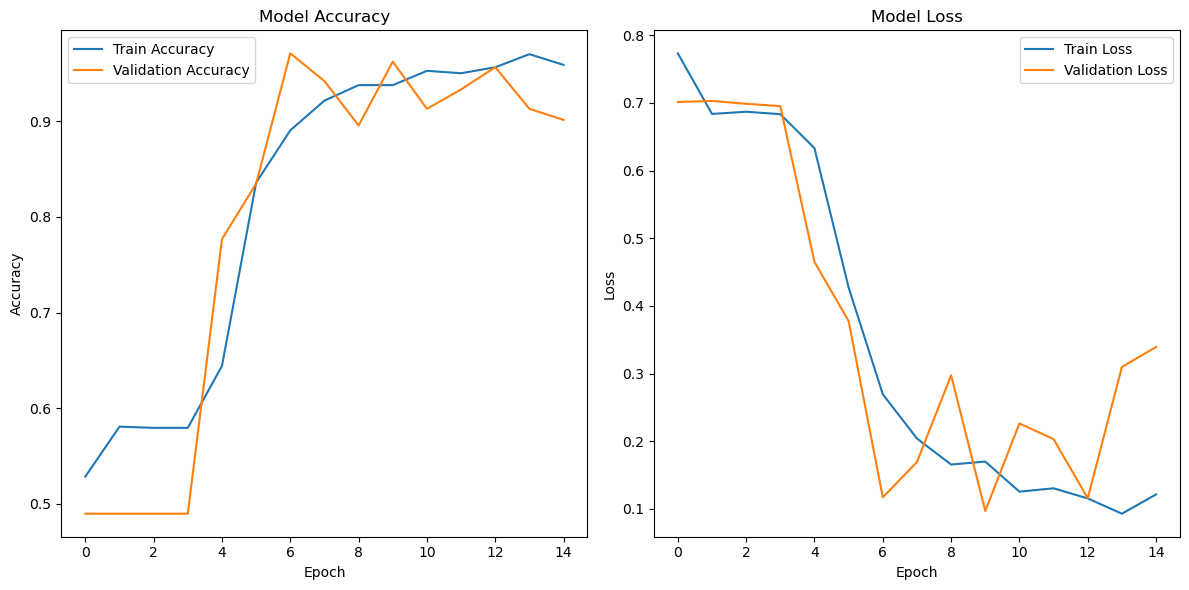

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()


In [28]:
import os
print(os.listdir('.'))


['.ipynb_checkpoints', 'signature forgery detection using tensorflo (1) (1) (2).ipynb', 'signature.keras', 'signatureforgery6layer.keras', 'signature_forgery5layer.keras', 'signature_forgery6layer.keras', 'testttt.ipynb', 'thumb-1920-5.jpg', 'vggkbk.keras']


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_labels
y_pred = model1.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      1.00      0.93       228
     Class 1       1.00      0.84      0.92       224

    accuracy                           0.92       452
   macro avg       0.93      0.92      0.92       452
weighted avg       0.93      0.92      0.92       452

Confusion Matrix:
[[228   0]
 [ 35 189]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


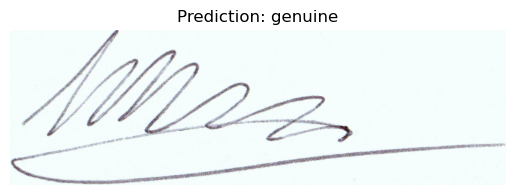

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0111060.PNG - Prediction: genuine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


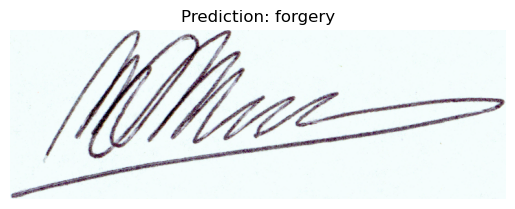

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0121060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


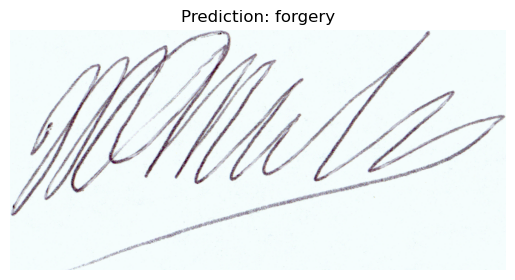

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0126060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


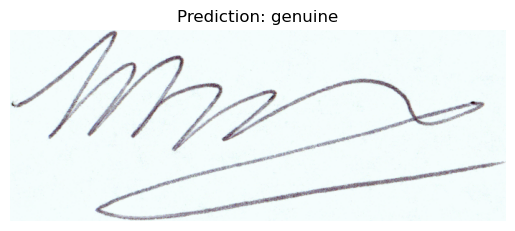

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0111060.PNG - Prediction: genuine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


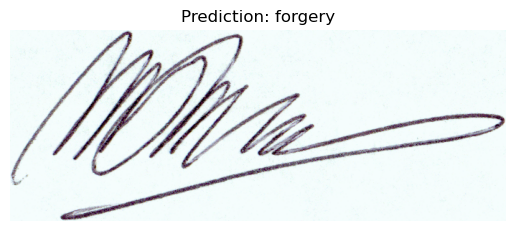

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0121060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


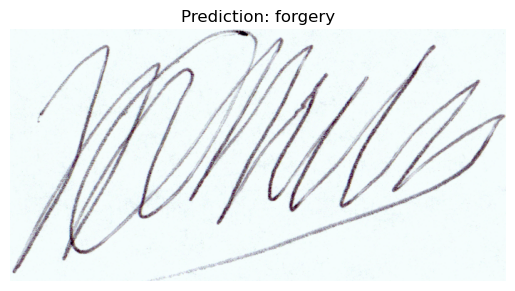

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0126060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


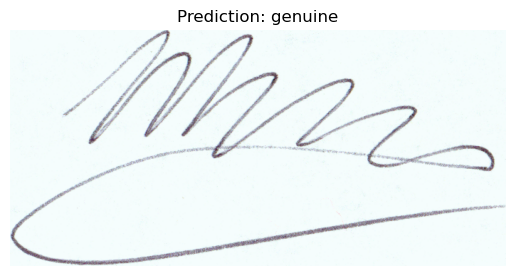

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0111060.PNG - Prediction: genuine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


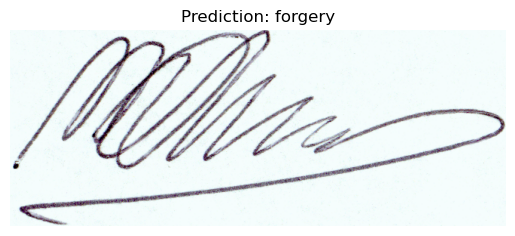

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0121060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


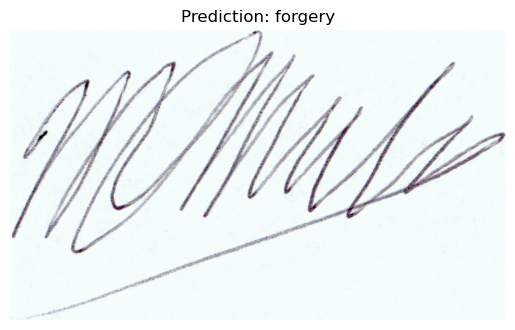

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0126060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


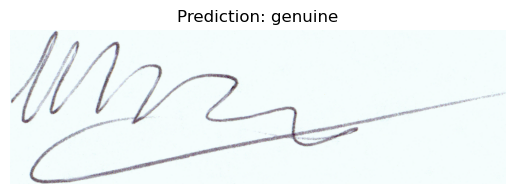

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0111060.PNG - Prediction: genuine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


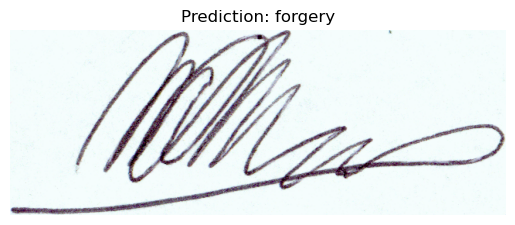

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0121060.PNG - Prediction: forgery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


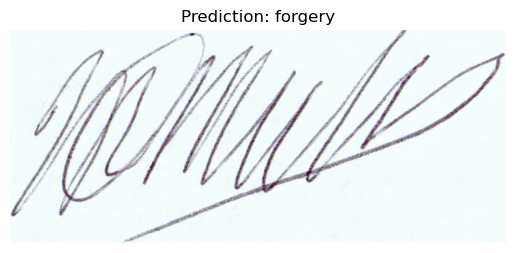

Image: C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0126060.PNG - Prediction: forgery


In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, target_size)          
    img = img_to_array(img)                    
    img = img / 255.0                          
    return np.expand_dims(img, axis=0)         
epochs1 = [1, 2, 3, 4, 5, 6]

image_paths = [
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0111060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0121060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\02_0126060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0111060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0121060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\03_0126060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0111060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0121060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\04_0126060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0111060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0121060.PNG",
    r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\test\060_forg\01_0126060.PNG"
]

model = load_model(r"C:\Users\KanugulBharath Kumar\Downloads\6layer.keras")

for image_path in image_paths:
    img = load_and_preprocess_image(image_path)
    prediction = model.predict(img)
    class_index = np.argmax(prediction, axis=1)[0]
    
    class_label = 'genuine' if class_index == 0 else 'forgery'
    
    img_to_show = cv2.imread(image_path)
    img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_to_show)
    plt.title(f"Prediction: {class_label}")
    plt.axis('off')
    plt.show()

    print(f'Image: {image_path} - Prediction: {class_label}')


In [31]:
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,371,144 (92.97 MB)

 Trainable params: 8,123,714 (30.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,247,430 (61.98 MB)

In [32]:
for layer in model.layers:
    print(layer.name)


conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
flatten
dense
dropout
dense_1


In [44]:
import os

def list_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return []

    image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in {'.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'}:
                image_files.append(os.path.join(root, file))

    return image_files

image_directory = r"C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train"

image_files = list_image_files(image_directory)

if image_files:
    print("Image files found:")
    for image_file in image_files:
        print(image_file)
else:
    print("No image files found.")


Image files found:
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_01.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_02.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_03.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_04.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_05.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_06.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_07.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_08.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_09.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6) 2\sign_data\Dataset\train\001\001_10.PNG
C:\Users\KanugulBharath Kumar\Downloads\archive (6)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [46]:
y_true = np.array([0, 1, 1, 0, 1, ...])  
y_pred_prob = model.predict(test_data)  

y_pred_prob = y_pred_prob[:, 1]  


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 226ms/step


In [48]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

y_true = np.array([0, 1, 1, 0, 1])

lb = LabelBinarizer()
y_true_binary = lb.fit_transform(y_true).ravel()


In [49]:
print(np.unique(y_true_binary))  


[0 1]


In [51]:
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred_prob: {len(y_pred_prob)}")


Length of y_true: 5
Length of y_pred_prob: 1149


# 5 layer cnn

In [65]:
from tensorflow.keras import models, layers

def build_model(input_shape, num_classes):
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.5))  
    model2.add(layers.Dense(num_classes, activation='softmax'))
    return model2
SIZE = 224 

input_shape = (SIZE, SIZE, 3)
num_classes = 2

model2 = build_model(input_shape, num_classes)
model2.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      75,497,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,887,426 (289.49 MB)

 Trainable params: 75,887,426 (289.49 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = model2.fit(
    train_data, train_labels,
    validation_split=0.3,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.5044 - loss: 3.4606 - val_accuracy: 0.4899 - val_loss: 0.7481
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5720 - loss: 0.6848 - val_accuracy: 0.4899 - val_loss: 0.7225
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5675 - loss: 0.6904 - val_accuracy: 0.4899 - val_loss: 0.7141
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5978 - loss: 0.6797 - val_accuracy: 0.4899 - val_loss: 0.6971
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5927 - loss: 0.6815 - val_accuracy: 0.4899 - val_loss: 0.6937
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5793 - loss: 0.6867 - val_accuracy: 0.4899 - val_loss: 0.6939
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5547 - loss: 0.6894 - val_accuracy: 0.4899 - val_loss: 0.6947
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5590 - loss: 0.6892 - val_accuracy: 0.4899 - val_loss:

In [69]:
test_loss, test_acc = model2.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.6235 - loss: 0.6809
Test Loss: 0.6888134479522705, Test Accuracy: 0.552654504776001


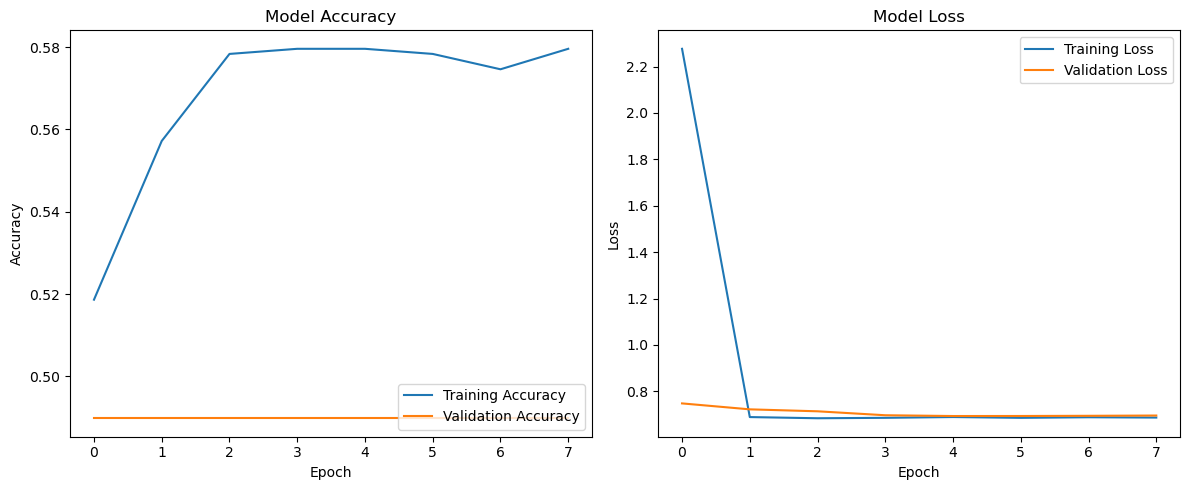

In [70]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [43]:
model2.save(r"C:\Users\KanugulBharath Kumar\Downloads\5signatureforgery5layer.keras")
model2 = load_model(r"C:\Users\KanugulBharath Kumar\Downloads\5signatureforgery5layer.keras")


# VGG16 (PRETRAINED MODEL)

In [86]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

def build_vgg16_model(input_shape=(SIZE, SIZE, 3), num_classes=2):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

model = build_vgg16_model()
model.summary()



Model: "functional_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,561,282 (105.14 MB)

 Trainable params: 27,561,282 (105.14 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:


callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('signature.keras', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

history = model.fit(
    train_data, train_labels,
    epochs=12,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 558s 19s/step - accuracy: 0.5531 - loss: 0.8254 - val_accuracy: 0.5261 - val_loss: 0.6339 - learning_rate: 1.0000e-04
Epoch 2/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 541s 19s/step - accuracy: 0.6608 - loss: 0.6068 - val_accuracy: 0.9000 - val_loss: 0.2661 - learning_rate: 1.0000e-04
Epoch 3/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 522s 18s/step - accuracy: 0.8588 - loss: 0.3463 - val_accuracy: 0.9826 - val_loss: 0.1427 - learning_rate: 1.0000e-04
Epoch 4/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 530s 18s/step - accuracy: 0.9314 - loss: 0.2239 - val_accuracy: 0.7739 - val_loss: 0.5210 - learning_rate: 1.0000e-04
Epoch 5/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 396s 13s/step - accuracy: 0.9166 - loss: 0.2183 - val_accuracy: 0.9783 - val_loss: 0.0628 - learning_rate: 1.0000e-04
Epoch 6/6
29/29 ━━━━━━━━━━━━━━━━━━━━ 391s 13s/step - accuracy: 0.9698 - loss: 0.0877 - val_accuracy: 0.9957 - val_loss: 0.0150 - learning_rate: 1.0000e-04
36/36 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.9561 - loss: 0.0

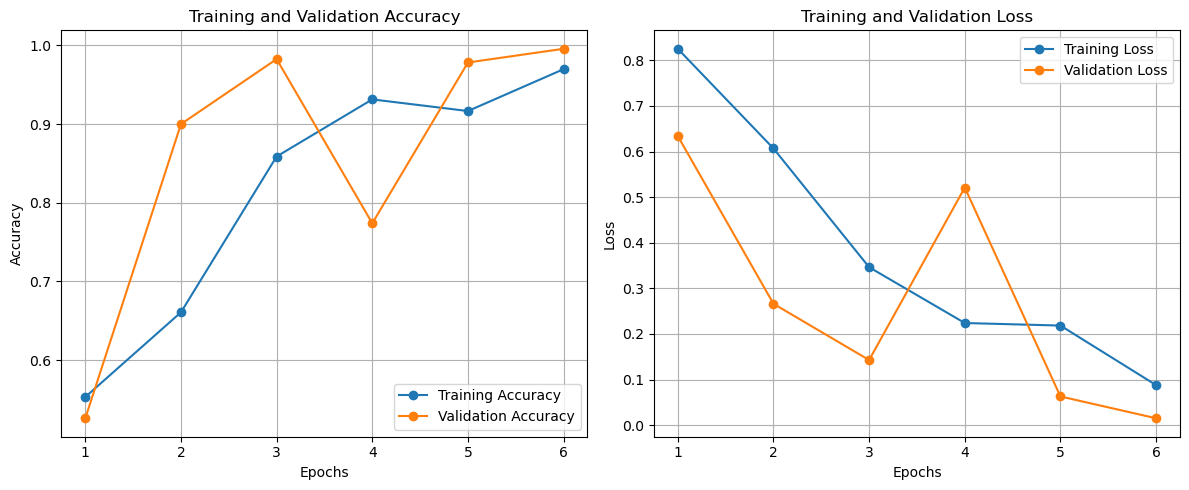

In [138]:
import matplotlib.pyplot as plt

# Training and validation metrics
epochs = [1, 2, 3, 4, 5, 6]
train_accuracy = [0.5531, 0.6608, 0.8588, 0.9314, 0.9166, 0.9698]
val_accuracy = [0.5261, 0.9000, 0.9826, 0.7739, 0.9783, 0.9957]

train_loss = [0.8254, 0.6068, 0.3463, 0.2239, 0.2183, 0.0877]
val_loss = [0.6339, 0.2661, 0.1427, 0.5210, 0.0628, 0.0150]

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting Accuracy
axs[0].plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
axs[0].plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(epochs)
axs[0].legend()
axs[0].grid()

# Plotting Loss
axs[1].plot(epochs, train_loss, label='Training Loss', marker='o')
axs[1].plot(epochs, val_loss, label='Validation Loss', marker='o')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(epochs)
axs[1].legend()
axs[1].grid()

# Show the plots
plt.tight_layout()
plt.show()


In [110]:
model.save('vggkbk.keras')

In [39]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tkinter import Tk, Button, Label, filedialog
from PIL import ImageTk, Image

#model = load_model('vggkbk.keras')
model = load_model('6layer.keras')


def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

class_labels = ['Genuine', 'Forgery']

def get_class_label(predictions):
    return class_labels[np.argmax(predictions)]

def upload_image():
    global panel
    img_path = filedialog.askopenfilename()

    if img_path:
        img = preprocess_image(img_path)
        prediction = model.predict(img)
        label = get_class_label(prediction)

        img_cv = cv2.imread(img_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)  

        h, w, _ = img_cv.shape
        max_size = 300
        scale = max_size / max(h, w)
        new_w, new_h = int(w * scale), int(h * scale)

        img_cv_resized = cv2.resize(img_cv, (new_w, new_h), interpolation=cv2.INTER_AREA)

        img_pil = Image.fromarray(img_cv_resized)
        img_tk = ImageTk.PhotoImage(img_pil)

        if panel is None:
            panel = Label(root, image=img_tk, bg='white')
            panel.image = img_tk
            panel.pack(padx=10, pady=10)
        else:
            panel.configure(image=img_tk)
            panel.image = img_tk

        result_label.config(text=f"Prediction: {label}")

def refresh_form():
    global panel
    if panel is not None:
        panel.config(image='')  
    result_label.config(text="Prediction will appear here")  

root = Tk()
root.title("Signature Forgery Detection using TensorFlow")
root.geometry("600x600")

root.attributes("-fullscreen", True)

bg_image = Image.open("thumb-1920-5.jpg")
bg_image = bg_image.resize((root.winfo_screenwidth(), root.winfo_screenheight()), Image.ANTIALIAS)
bg_photo = ImageTk.PhotoImage(bg_image)

background_label = Label(root, image=bg_photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

form_frame = Label(root, borderwidth=2, relief="groove", padx=10, pady=20, bg="white")
form_frame.pack(pady=30)

header_label = Label(form_frame, text="GEETHANJALI COLLEGE OF ENGINEERING AND TECHNOLOGY", font=("Arial", 16, "bold"), bg="white")
header_label.pack(pady=10)

sub_header_label = Label(form_frame, text="(UGC AUTONOMOUS INSTITUTION)", font=("Arial", 12), bg="white")
sub_header_label.pack(pady=5)

address_label = Label(form_frame, text="Cheeryal (V), Keesara (M), Medchal (Dist), Telangana – 501 301.", font=("Arial", 10), bg="white")
address_label.pack(pady=2)

department_label = Label(form_frame, text="Department of ARTIFICIAL INTELLIGENCE & MACHINE LEARNING", font=("Arial", 12, "bold"), bg="white")
department_label.pack(pady=5)

mini_project_label = Label(form_frame, text="Mini Project", font=("Arial", 14, "bold"), bg="white")
mini_project_label.pack(pady=10)

form_title = Label(form_frame, text="Signature Forgery Detection", font=("Arial", 14, "bold"), bg="white")
form_title.pack(pady=10)

panel = None

upload_btn = Button(form_frame, text="Upload Signature", command=upload_image, font=("Arial", 12), width=20)
upload_btn.pack(pady=10)

refresh_btn = Button(form_frame, text="Refresh", command=refresh_form, font=("Arial", 12), width=20)
refresh_btn.pack(pady=10)

result_label = Label(form_frame, text="Prediction will appear here", font=("Arial", 14), bg="white")
result_label.pack(pady=20)

footer_label = Label(form_frame, text="Developed By Team : (A2) Batch : (2021-2025)", font=("Arial", 10), bg="white")
footer_label.pack(side="bottom", pady=10)

root.mainloop()


C:\Users\KanugulBharath Kumar\AppData\Local\Temp\ipykernel_5848\987905865.py:69: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  bg_image = bg_image.resize((root.winfo_screenwidth(), root.winfo_screenheight()), Image.ANTIALIAS)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
